# Carregar dados

In [91]:
import pandas as pd

# # Mostrar mais colunas
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)

df = pd.read_parquet("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.gzip")

qnt_full = len(df)
print(f"""
Quantidade docs: {qnt_full}
""")

df.head(2)



Quantidade docs: 1543009



,ano,sigla_uf_id,regiao,regiao_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo
0,2019,11,Centro-Oeste,0,MS,997.99,0,17,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),1,Masculino
1,2019,11,Centro-Oeste,0,MS,0.00,0,36,212420,Analista de Suporte Computacional,1,Masculino


In [92]:
df[df["remuneracao_media"] > 0]["ano"].value_counts()
# df["ano"].value_counts()


2021    680910
2018    462175
2020    214433
2019    149064
Name: ano, dtype: int64

In [93]:
df_2019 = df[df["ano"] == 2019]
df_2020 = df[df["ano"] == 2020]

print(f"""
Quantidade
df_2019: {len(df_2019)}
df_2020: {len(df_2020)}
""")



Quantidade
df_2019: 162073
df_2020: 222102



# Verificando Dados Gerais

In [94]:
df.describe()

,ano,sigla_uf_id,regiao_id,remuneracao_media,desligamento,idade,ocupacao_id,sexo_id
count,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06
mean,2.019738e+03,1.882856e+01,2.698468e+00,5.362849e+03,6.039168e-01,3.396295e+01,2.479460e+05,1.206990e+00
std,1.302020e+00,7.084583e+00,1.103642e+00,5.154174e+03,4.890823e-01,9.633748e+00,4.960089e+04,4.051482e-01
min,2.018000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,2.122050e+05,1.000000e+00
25%,2.018000e+03,1.400000e+01,3.000000e+00,2.010510e+03,0.000000e+00,2.700000e+01,2.124050e+05,1.000000e+00
50%,2.020000e+03,2.200000e+01,3.000000e+00,3.728800e+03,1.000000e+00,3.200000e+01,2.124150e+05,1.000000e+00
75%,2.021000e+03,2.500000e+01,3.000000e+00,7.105950e+03,1.000000e+00,3.900000e+01,3.171100e+05,1.000000e+00
max,2.021000e+03,2.600000e+01,4.000000e+00,1.614076e+05,1.000000e+00,9.200000e+01,3.172100e+05,2.000000e+00


# Dados por Estado, Sexo

In [95]:
# graf_sigla_uf = df[["sigla_uf"]].value_counts(ascending=True).plot(kind="barh", 
#                                                                    figsize=(15, 10), 
#                                                                    title="Quantidade de profissionais por UF")
# graf_sigla_uf.get_figure().savefig("./output/gold/graf_sigla_uf.png")

In [96]:
# graf_sexo = df[["sexo"]].value_counts(ascending=True).plot(kind="barh", 
#                                                                    figsize=(10, 8), 
#                                                                    title="Sexo")
# graf_sexo.get_figure().savefig("./output/gold/graf_sexo.png")


# Analisando

## Quantidade de Profissionais de TI de 2018 a 2021

In [97]:
# show df grouping by ano, and from this, show the group by sexo
df.groupby(["ano", "sexo"]).size().reset_index(name="qnt")

,ano,sexo,qnt
0,2018,Feminino,101658
1,2018,Masculino,365194
2,2019,Feminino,25888
3,2019,Masculino,136185
4,2020,Feminino,44657
5,2020,Masculino,177445
6,2021,Feminino,147184
7,2021,Masculino,544798


### Salários

Por: ANO 2019, Sexo, Região

In [98]:
# df_ana = df_2019[["sigla_uf", "desligamento", "ocupacao", "sexo", "remuneracao_media"]]
# df_ana = df_2020[["sigla_uf", "desligamento", "ocupacao", "sexo", "regiao", "remuneracao_media"]]
df_ana = df[["sigla_uf", "ano", "desligamento", "ocupacao", "sexo", "regiao", "remuneracao_media"]]
df_ana


,sigla_uf,ano,desligamento,ocupacao,sexo,regiao,remuneracao_media
0,MS,2019,0,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),Masculino,Centro-Oeste,997.99
1,MS,2019,0,Analista de Suporte Computacional,Masculino,Centro-Oeste,0.00
2,MS,2019,0,Programador de Sistemas de Informacao,Masculino,Centro-Oeste,1547.16
3,MS,2019,0,Operador de Computador (Inclusive Microcomputador),Masculino,Centro-Oeste,1456.14
4,MS,2019,0,Operador de Computador (Inclusive Microcomputador),Masculino,Centro-Oeste,1314.90
...,...,...,...,...,...,...,...
1543004,RS,2021,1,Analista de Desenvolvimento de Sistemas,Feminino,Sul,10415.10
1543005,RS,2021,1,Analista de Desenvolvimento de Sistemas,Feminino,Sul,9932.69
1543006,RS,2021,1,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),Feminino,Sul,777.17
1543007,RS,2021,1,Programador de Sistemas de Informacao,Feminino,Sul,6421.08


In [99]:
df_ana["ano"].value_counts()


2021    691982
2018    466852
2020    222102
2019    162073
Name: ano, dtype: int64

# Remun. Média

In [100]:
df_ana = df_ana[df["remuneracao_media"] > 0]

In [169]:
def gerar_estaticas(df, cols_agg=["ano", "sexo"], col_estat="remuneracao_media", new_col_estat=["min", "max", "std", "mean"]):
  df_c = df.copy()

  df_c = df_c.groupby(cols_agg).agg(
      {col_estat: new_col_estat})

  # round values to 2 decimal places
  df_c = df_c.round(2)

  col_estat_dif = new_col_estat[-1]

  # add a col with difference in percentual between rows of col mea
  df_c["dif_m"] = df_c[col_estat][col_estat_dif] - \
      df_c[col_estat][col_estat_dif].shift(1)

  df_c["dif_m"][::2] = 0
  df_c["dif_m"] = df_c["dif_m"].round(2)

  # create col dif_p as dif_m in percentual
  df_c["dif_p"] = df_c["dif_m"] / \
      df_c[col_estat][col_estat_dif].shift(1) * 100

  df_c["dif_p"] = df_c["dif_p"].round(2)

  # new col with diff as percentage
  df_c["dif_p"] = df_c["dif_p"].astype(str) + "%"

  # Removendo valores desnecessários
  df_c["dif_m"] = df_c["dif_m"].astype(str)
  df_c["dif_m"] = df_c["dif_m"].replace("0.0", "")

  df_c["dif_p"] = df_c["dif_p"].replace("nan%", "")
  df_c["dif_p"] = df_c["dif_p"].replace("0.0%", "")

  # align all columns in one row
  df_c.columns = df_c.columns.map('_'.join)

  # remove the text "remuneracao_" from columns names
  df_c.columns = df_c.columns.str.replace(col_estat +"_", "")
  df_c.columns = df_c.columns.str.replace("_", "")

  return df_c

df_ana_r = gerar_estaticas(df_ana, new_col_estat=["mean"])
df_ana_r

mean    difm    difp
ano  sexo                              
2018 Feminino   4592.03                
     Masculino  5526.76  934.73  20.36%
2019 Feminino   5526.83                
     Masculino  5533.10    6.27   0.11%
2020 Feminino   4007.78                
     Masculino  4908.28   900.5  22.47%
2021 Feminino   5144.01                
     Masculino  6027.07  883.06  17.17%

In [171]:

df_ana_r = gerar_estaticas(
    df_ana, cols_agg=["ano", "regiao", "sexo"], new_col_estat=["mean"])
df_ana_r


mean     difm     difp
ano  regiao       sexo                                 
2018 Centro-Oeste Feminino    6979.09                  
                  Masculino   6801.06  -178.03   -2.55%
     Nordeste     Feminino    4247.12                  
                  Masculino   4044.22   -202.9   -4.78%
     Norte        Feminino    2859.67                  
                  Masculino   4024.01  1164.34   40.72%
     Sudeste      Feminino    5256.70                  
                  Masculino   5985.95   729.25   13.87%
     Sul          Feminino    4767.86                  
                  Masculino   4996.56    228.7     4.8%
2019 Centro-Oeste Feminino   10576.11                  
                  Masculino   9612.65  -963.46   -9.11%
     Nordeste     Feminino    2848.94                  
                  Masculino   3677.29   828.35   29.08%
     Norte        Feminino    3390.81                  
                  Masculino   3260.72  -130.09   -3.84%
     Sudeste      Feminino    5271.16                  
                  Masculino   5377.40   106.24    2.02%
     Sul          Feminino    3905.04                  
                  Masculino   4250.18   345.14    8.84%
2020 Centro-Oeste Feminino    4287.08                  
                  Masculino   6337.51  2050.43   47.83%
     Nordeste     Feminino    3161.25                  
                  Masculino   3481.98   320.73   10.15%
     Norte        Feminino    3741.41                  
                  Masculino   3161.25  -580.16  -15.51%
     Sudeste      Feminino    4386.02                  
                  Masculino   5285.72    899.7   20.51%
     Sul          Feminino    3275.24                  
                  Masculino   3942.60   667.36   20.38%
2021 Centro-Oeste Feminino    5426.14                  
                  Masculino   6782.73  1356.59    25.0%
     Nordeste     Feminino    4077.23                  
                  Masculino   4003.20   -74.03   -1.82%
     Norte        Feminino    4177.48                  
                  Masculino   4571.86   394.38    9.44%
     Sudeste      Feminino    5541.26                  
                  Masculino   6552.65  1011.39   18.25%
     Sul          Feminino    4097.54                  
                  Masculino   4981.30   883.76   21.57%

<Axes: title={'center': 'Quantidade de profissionais por região e sexo'}, xlabel='Quantidade de profissionais', ylabel='Região e sexo'>

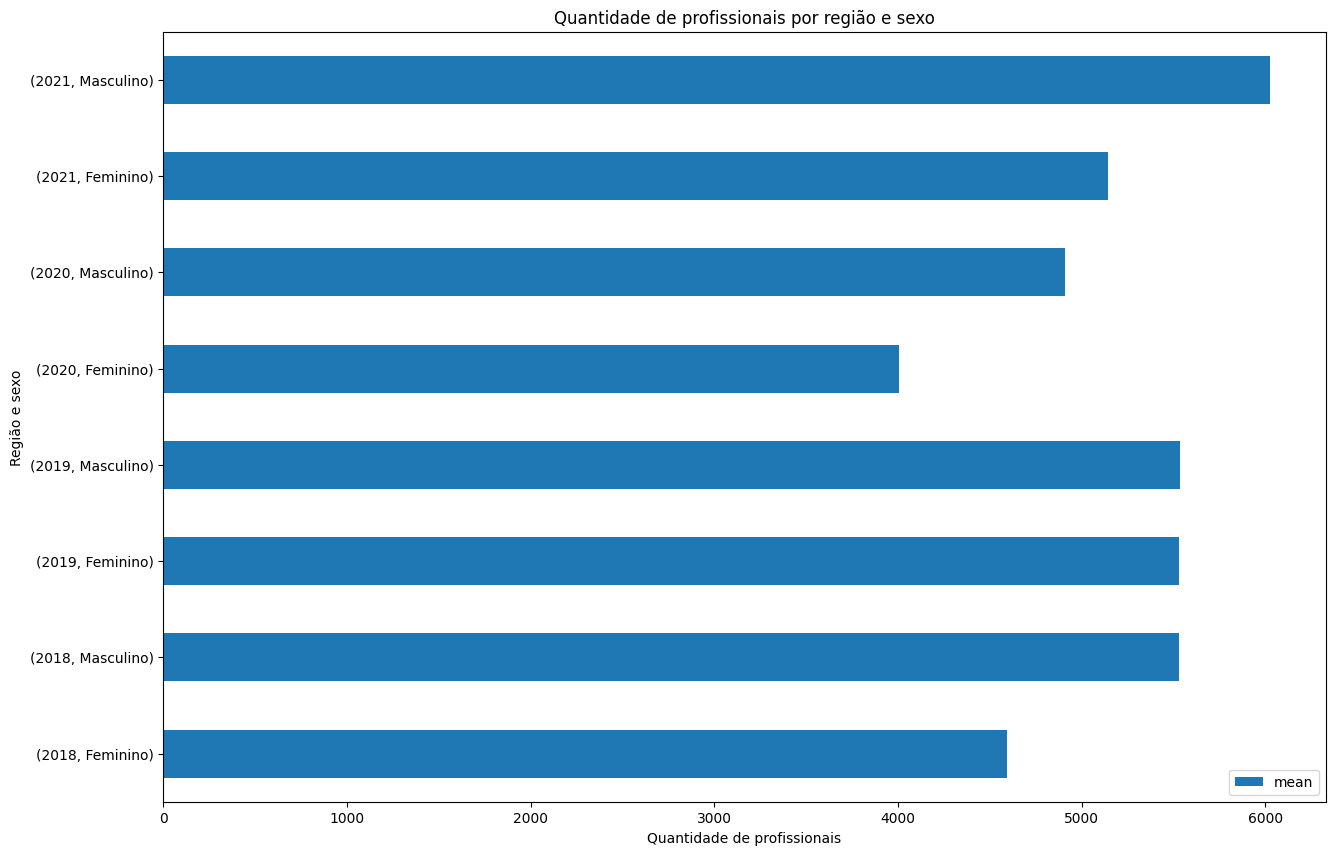

In [200]:
# plot a grapth of df_ana_d by ano and regiao
df_ana_r = gerar_estaticas(
    df_ana, cols_agg=["ano", "sexo"], new_col_estat=["mean"])

# cross table of the graph below
# df_ana_r = df_ana_r.T

df_ana_r.plot(kind="barh", figsize=(15, 10),
              title="Quantidade de profissionais por região e sexo",
              xlabel="Quantidade de profissionais",
              ylabel="Região e sexo")

In [172]:
# export to table in latex to 2 decimal places

# add hline to table
df_ana_r.to_latex("./output/silver/df_ana_rm.tex", index=True, escape=True)

C:\Users\celiudos\AppData\Local\Temp\ipykernel_12480\2612461903.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ana_r.to_latex("./output/silver/df_ana_rm.tex", index=True, escape=True)


# Demissões

In [166]:
df_ana_d = gerar_estaticas(
    df_ana, col_estat="desligamento", new_col_estat=["count"])
df_ana_d


count       difm     difp
regiao       sexo                                 
Centro-Oeste Feminino    21793        nan         
             Masculino   99296    77503.0  355.63%
Nordeste     Feminino    25299   -73997.0  -74.52%
             Masculino  108132    82833.0  327.42%
Norte        Feminino    34446   -73686.0  -68.14%
             Masculino   49342    14896.0   43.24%
Sudeste      Feminino   181500   132158.0  267.84%
             Masculino  725718   544218.0  299.84%
Sul          Feminino    48754  -676964.0  -93.28%
             Masculino  212302   163548.0  335.46%

In [180]:

df_ana_d = gerar_estaticas(
    df_ana, cols_agg=["ano", "regiao", "sexo"], col_estat="desligamento", new_col_estat=["count"])

# replace col difm each even row with 0

# Removendo valores desnecessários
df_ana_d["difm"][::2] = 0
df_ana_d["difp"][::2] = 0

df_ana_d["difm"] = df_ana_d["difm"].astype(str)
df_ana_d["difm"] = df_ana_d["difm"].replace("0", "")

df_ana_d["difp"] = df_ana_d["difp"].astype(str)
df_ana_d["difp"] = df_ana_d["difp"].replace("0", "")

df_ana_d

count      difm     difp
ano  regiao       sexo                                
2018 Centro-Oeste Feminino     7475                   
                  Masculino   27762   20287.0   271.4%
     Nordeste     Feminino     7886                   
                  Masculino   35368   27482.0  348.49%
     Norte        Feminino    27383                   
                  Masculino   31209    3826.0   13.97%
     Sudeste      Feminino    45345                   
                  Masculino  207928  162583.0  358.55%
     Sul          Feminino    12363                   
                  Masculino   59456   47093.0  380.92%
2019 Centro-Oeste Feminino     3135                   
                  Masculino   16455   13320.0  424.88%
     Nordeste     Feminino     1796                   
                  Masculino    9765    7969.0  443.71%
     Norte        Feminino      801                   
                  Masculino    1722     921.0  114.98%
     Sudeste      Feminino    14399                   
                  Masculino   70987   56588.0   393.0%
     Sul          Feminino     3470                   
                  Masculino   26534   23064.0  664.67%
2020 Centro-Oeste Feminino     3001                   
                  Masculino   15757   12756.0  425.06%
     Nordeste     Feminino     3939                   
                  Masculino   17567   13628.0  345.98%
     Norte        Feminino     4031                   
                  Masculino    4085      54.0    1.34%
     Sudeste      Feminino    24390                   
                  Masculino  103504   79114.0  324.37%
     Sul          Feminino     7720                   
                  Masculino   30439   22719.0  294.29%
2021 Centro-Oeste Feminino     8182                   
                  Masculino   39322   31140.0  380.59%
     Nordeste     Feminino    11678                   
                  Masculino   45432   33754.0  289.04%
     Norte        Feminino     2231                   
                  Masculino   12326   10095.0  452.49%
     Sudeste      Feminino    97366                   
                  Masculino  343299  245933.0  252.59%
     Sul          Feminino    25201                   
                  Masculino   95873   70672.0  280.43%

In [181]:

df_ana_d.to_latex("./output/silver/df_ana_dm.tex", index=True, escape=True)


C:\Users\celiudos\AppData\Local\Temp\ipykernel_12480\3062245318.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ana_d.to_latex("./output/silver/df_ana_dm.tex", index=True, escape=True)


<Axes: title={'center': 'Quantidade de desligamentos por ano e região'}, ylabel='ano,regiao,sexo'>

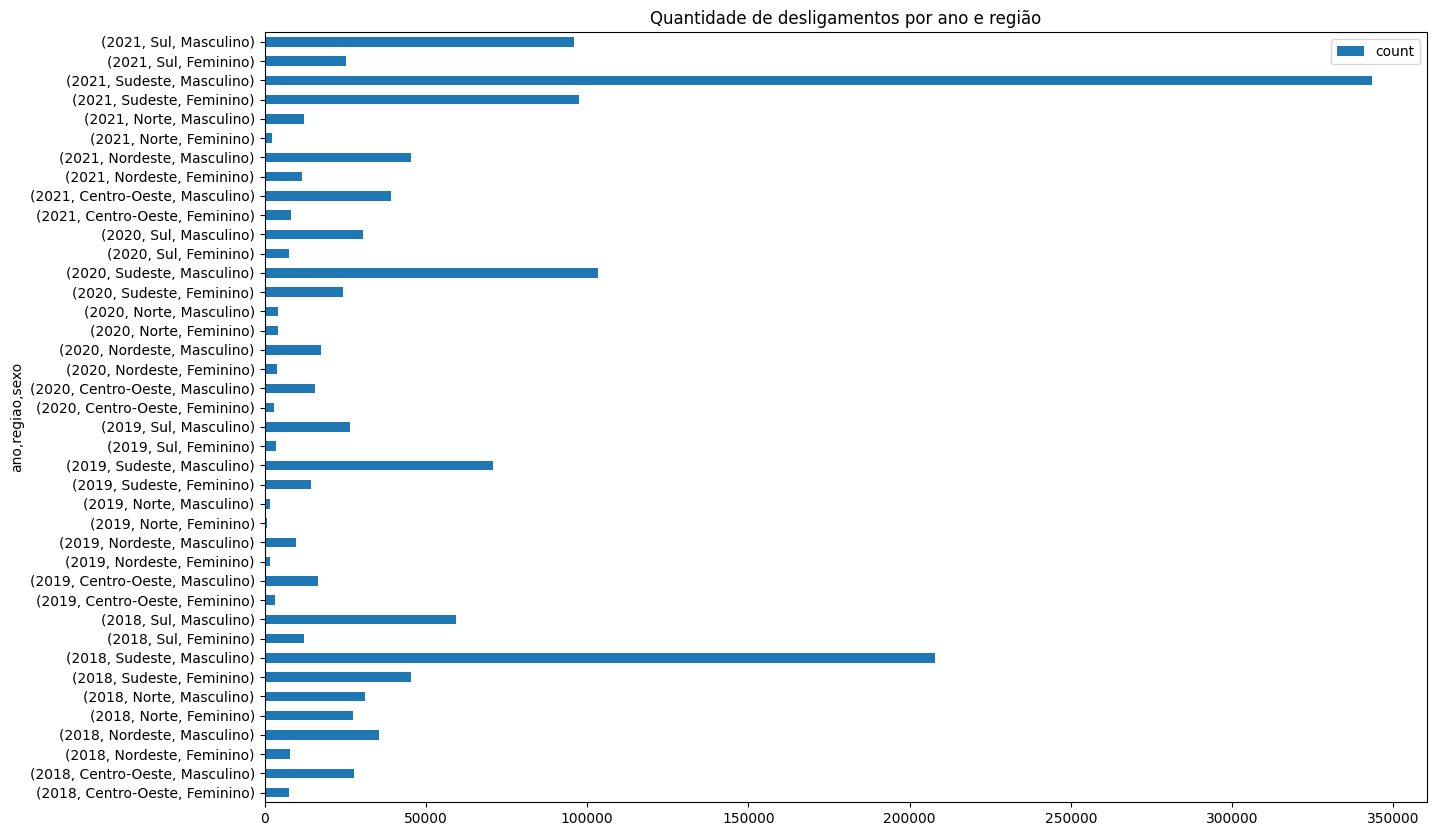

In [186]:
# plot a grapth of df_ana_d by ano and regiao
df_ana_d.plot(kind="barh", figsize=(15, 10),
              title="Quantidade de desligamentos por ano e região")


In [189]:
df_ana.head(2)

,sigla_uf,ano,desligamento,ocupacao,sexo,regiao,remuneracao_media
0,MS,2019,0,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),Masculino,Centro-Oeste,997.99
2,MS,2019,0,Programador de Sistemas de Informacao,Masculino,Centro-Oeste,1547.16


C:\Users\celiudos\AppData\Local\Temp\ipykernel_12480\3897802445.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)


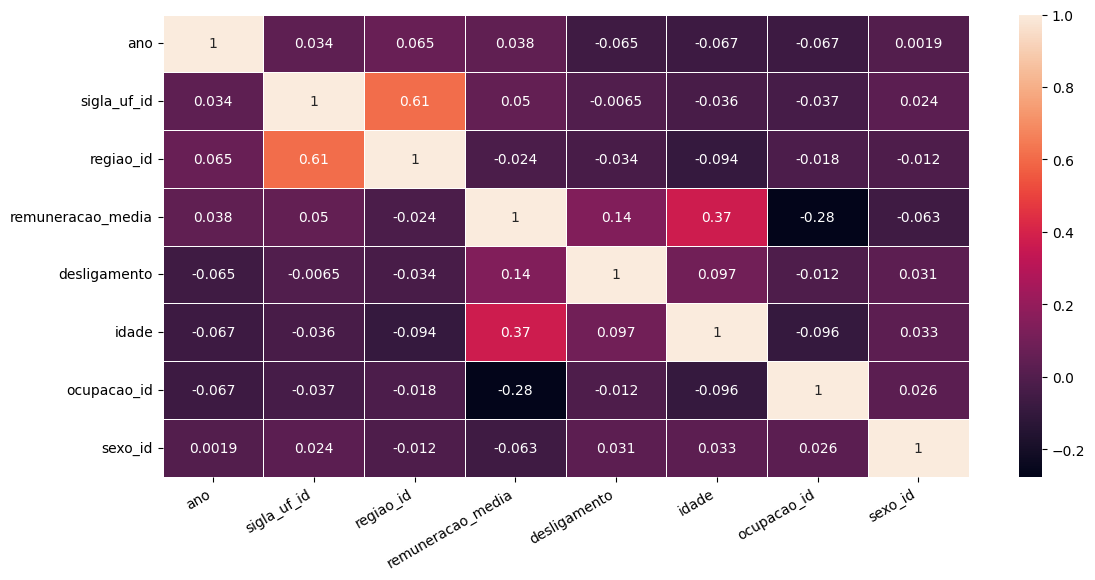

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
sns.heatmap(df.corr(), vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()


In [106]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_dm = df_ana.groupby(["ano", "regiao", "sexo"]).agg(
    {"desligamento": ["count"]}).copy()

# round values to 2 decimal places
df_ana_dm = df_ana_dm.round(2)

df_ana_dm


desligamento
                                   count
ano  regiao       sexo                  
2018 Centro-Oeste Feminino          7475
                  Masculino        27762
     Nordeste     Feminino          7886
                  Masculino        35368
     Norte        Feminino         27383
                  Masculino        31209
     Sudeste      Feminino         45345
                  Masculino       207928
     Sul          Feminino         12363
                  Masculino        59456
2019 Centro-Oeste Feminino          3135
                  Masculino        16455
     Nordeste     Feminino          1796
                  Masculino         9765
     Norte        Feminino           801
                  Masculino         1722
     Sudeste      Feminino         14399
                  Masculino        70987
     Sul          Feminino          3470
                  Masculino        26534
2020 Centro-Oeste Feminino          3001
                  Masculino        15757
     Nordeste     Feminino          3939
                  Masculino        17567
     Norte        Feminino          4031
                  Masculino         4085
     Sudeste      Feminino         24390
                  Masculino       103504
     Sul          Feminino          7720
                  Masculino        30439
2021 Centro-Oeste Feminino          8182
                  Masculino        39322
     Nordeste     Feminino         11678
                  Masculino        45432
     Norte        Feminino          2231
                  Masculino        12326
     Sudeste      Feminino         97366
                  Masculino       343299
     Sul          Feminino         25201
                  Masculino        95873

In [107]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_dm = df_ana.groupby(["regiao", "sexo"]).agg(
    {"desligamento": ["count"]}).copy()

# round values to 2 decimal places
df_ana_dm = df_ana_dm.round(2)

df_ana_dm


desligamento
                              count
regiao       sexo                  
Centro-Oeste Feminino         21793
             Masculino        99296
Nordeste     Feminino         25299
             Masculino       108132
Norte        Feminino         34446
             Masculino        49342
Sudeste      Feminino        181500
             Masculino       725718
Sul          Feminino         48754
             Masculino       212302

In [108]:
# add a col with difference in percentual between rows of col mean
df_ana_dm["diff"] = df_ana_dm["desligamento"]["count"].diff(
) / df_ana_dm["desligamento"]["count"] * 100

df_ana_dm["diff"] = df_ana_dm["diff"].round(2)

pd.set_option('mode.chained_assignment', None)  # remove warning
df_ana_dm["diff"][::2] = 0

df_ana_dm


desligamento     diff
                              count         
regiao       sexo                           
Centro-Oeste Feminino         21793      NaN
             Masculino        99296    78.05
Nordeste     Feminino         25299  -292.49
             Masculino       108132    76.60
Norte        Feminino         34446  -213.92
             Masculino        49342    30.19
Sudeste      Feminino        181500    72.81
             Masculino       725718    74.99
Sul          Feminino         48754 -1388.53
             Masculino       212302    77.04

In [109]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_dm = df_ana.groupby(["ano", "sexo"]).agg(
    {"desligamento": ["count"]}).copy()

# round values to 2 decimal places
df_ana_dm = df_ana_dm.round(2)

# Add column with cumulative from count by ano and zero each even row
df_ana_dm["cumsum"] = df_ana_dm["desligamento"]["count"].cumsum()

df_ana_dm
# df_ana_dm[df_ana_dm["ano"] == "2018"]


desligamento   cumsum
                      count         
ano  sexo                           
2018 Feminino        100452   100452
     Masculino       361723   462175
2019 Feminino         23601   485776
     Masculino       125463   611239
2020 Feminino         43081   654320
     Masculino       171352   825672
2021 Feminino        144658   970330
     Masculino       536252  1506582

In [110]:
# export to table in latex to 2 decimal places
df_ana_dm.reset_index().to_latex("./output/silver/df_ana_dm.tex", index=False)


C:\Users\celiudos\AppData\Local\Temp\ipykernel_12480\1904170663.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ana_dm.reset_index().to_latex("./output/silver/df_ana_dm.tex", index=False)


# Cargos

In [111]:
# from df_ana, count the number of ocupacao by sexo
df_ana.groupby(["ocupacao", "sexo"]).size().reset_index()


,ocupacao,sexo,0
0,Administrador de Banco de Dados,Feminino,2987
1,Administrador de Banco de Dados,Masculino,11807
2,Administrador de Redes,Feminino,1939
3,Administrador de Redes,Masculino,16382
4,Administrador de Sistemas Operacionais,Feminino,5070
5,Administrador de Sistemas Operacionais,Masculino,18487
6,Administrador em Segurança da Informação,Feminino,2886
7,Administrador em Segurança da Informação,Masculino,11571
8,Analista de Desenvolvimento de Sistemas,Feminino,105741
9,Analista de Desenvolvimento de Sistemas,Masculino,435758


In [112]:
# df_ana["diff"] = df_ana["remuneracao_media"].diff()
df_temp = df_ana.groupby(["ocupacao", "sexo"]).size().reset_index()
# create a new column with the difference between the current row and the previous row
df_temp["diff"] = df_temp[0].diff()

df_temp


,ocupacao,sexo,0,diff
0,Administrador de Banco de Dados,Feminino,2987,NaN
1,Administrador de Banco de Dados,Masculino,11807,8820.0
2,Administrador de Redes,Feminino,1939,-9868.0
3,Administrador de Redes,Masculino,16382,14443.0
4,Administrador de Sistemas Operacionais,Feminino,5070,-11312.0
5,Administrador de Sistemas Operacionais,Masculino,18487,13417.0
6,Administrador em Segurança da Informação,Feminino,2886,-15601.0
7,Administrador em Segurança da Informação,Masculino,11571,8685.0
8,Analista de Desenvolvimento de Sistemas,Feminino,105741,94170.0
9,Analista de Desenvolvimento de Sistemas,Masculino,435758,330017.0


In [113]:

df_temp.sort_values(by=["diff"], ascending=False)


,ocupacao,sexo,0,diff
9,Analista de Desenvolvimento de Sistemas,Masculino,435758,330017.0
31,Programador de Sistemas de Informacao,Masculino,203877,148202.0
15,Analista de Suporte Computacional,Masculino,186694,139753.0
8,Analista de Desenvolvimento de Sistemas,Feminino,105741,94170.0
33,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),Masculino,111371,80450.0
30,Programador de Sistemas de Informacao,Feminino,55675,51188.0
11,Analista de Redes e de Comunicacao de Dados,Masculino,73424,47969.0
23,Operador de Computador (Inclusive Microcomputador),Masculino,57212,34504.0
14,Analista de Suporte Computacional,Feminino,46941,28192.0
13,Analista de Sistemas de Automacao,Masculino,18749,14546.0


# Outros

In [114]:
# df_ana[df_ana["sigla_uf"].isin(REGIOES["Norte"])].describe()


In [115]:
# group df_ana by sigla_uf and show mean of valor_remuneracao_media

# df_ana.groupby(["sigla_uf", "sexo"]).mean().reset_index()

# Correlação entre colunas

- Correlação entre Ano, Estado, Idade, Ocupação, Sexo, Cor

In [116]:
# # https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

# df_apenas_ids = df[[
#     "ano", "sigla_uf_id", "idade", "ocupacao_id", "sexo_id", "raca_cor_id"]]

# corr_an = df_apenas_ids.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# # corr_an = df_apenas_ids.corr()
# corr_an

Matriz de correlação: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between

In [117]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(13, 6))
# sns.heatmap(corr_an, vmax=1, annot=True, linewidths=.5)
# plt.xticks(rotation=30, horizontalalignment="right")
# plt.show()


In [118]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(df_apenas_ids, figsize=(12, 8))

